# Limpeza de dados e estatística descritiva

Neste desafio colocaremos em prática alguns conceitos apresentado nas aulas. Para isso, usaremos o conjunto de dados [Prestação de contas eleitorais - 2020](https://dadosabertos.tse.jus.br/dataset/prestacao-de-contas-eleitorais-2020) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.

Os dados também podem ser encontrados na pasta "Dados" deste repositório.

Preencha as lacunas abaixo para completar o desafio.

# Importe os pacotes necessários

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Leia o arquivo "receitas_orgaos_partidarios_2020_NORTE.csv" que está na pasta dados desse repositório, usando o Pandas

Na aula `1.10 - Outliers e valores faltantes`, vimos como utilizar o método `replace` para substituir valores em certos colunas do nosso dataframe e trocar o texto (string) `#NULO#` pela representação padrão do Pandas para valores nulos.

Aqui, vamos utilizar um outro método, onde definimos quais strings serão considerados valores nulos já na importação do arquivo.

Edite as células abaixo e inclua:

* O nome do arquivo que queremos importar
* O separador utilizado
* Insira uma lista no parâmetro `na_values` que contenha o texto a ser ignorado.

Experimente rodar os comandos primeiro sem e depois com o parâmetro `na_values`, então, compare a diferença. Observe, por exemplo, o campo `CD_CNAE_DOADOR`.

In [3]:
df = pd.read_csv(r'..\base_dados\receitas_orgaos_partidarios_2020_NORTE.csv',sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   6052 non-null   object 
 1   HH_GERACAO                   6052 non-null   object 
 2   ANO_ELEICAO                  6052 non-null   int64  
 3   CD_TIPO_ELEICAO              6052 non-null   int64  
 4   NM_TIPO_ELEICAO              6052 non-null   object 
 5   TP_PRESTACAO_CONTAS          6052 non-null   object 
 6   DT_PRESTACAO_CONTAS          6052 non-null   object 
 7   SQ_PRESTADOR_CONTAS          6052 non-null   int64  
 8   CD_ESFERA_PARTIDARIA         6052 non-null   object 
 9   DS_ESFERA_PARTIDARIA         6052 non-null   object 
 10  SG_UF                        6052 non-null   object 
 11  CD_MUNICIPIO                 5043 non-null   float64
 12  NM_MUNICIPIO                 5043 non-null   object 
 13  NR_CNPJ_PRESTADOR_

In [4]:
df_limpo = pd.read_csv(r'..\base_dados\receitas_orgaos_partidarios_2020_NORTE.csv',
                 sep=';',
                 na_values=['#NULO#','#NULO',-1])

df_limpo = df_limpo.loc[:, df_limpo.columns.tolist()].replace(np.nan, -1)

# df_limpo = df.loc[:,df.columns.to_list()].replace({'#NULO': None,
#                                          '#NULO#': None,
#                                          -1: None})

df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6052 entries, 0 to 6051
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DT_GERACAO                   6052 non-null   object 
 1   HH_GERACAO                   6052 non-null   object 
 2   ANO_ELEICAO                  6052 non-null   int64  
 3   CD_TIPO_ELEICAO              6052 non-null   int64  
 4   NM_TIPO_ELEICAO              6052 non-null   object 
 5   TP_PRESTACAO_CONTAS          6052 non-null   object 
 6   DT_PRESTACAO_CONTAS          6052 non-null   object 
 7   SQ_PRESTADOR_CONTAS          6052 non-null   int64  
 8   CD_ESFERA_PARTIDARIA         6052 non-null   object 
 9   DS_ESFERA_PARTIDARIA         6052 non-null   object 
 10  SG_UF                        6052 non-null   object 
 11  CD_MUNICIPIO                 6052 non-null   float64
 12  NM_MUNICIPIO                 6052 non-null   object 
 13  NR_CNPJ_PRESTADOR_

# Filtre apenas os registros que sejam da prestação de contas final


In [5]:
# Primeiro vamos ver os valores únicos da coluna TP_PRESTACAO_CONTAS

df['TP_PRESTACAO_CONTAS'].unique()

array(['Final', 'Parcial', 'Relatório Financeiro',
       'Regularização da Omissão'], dtype=object)

In [6]:
# O resultado deste comando nos diz que quantas linhas e colunas temos antes do filtro
df.shape

(6052, 48)

In [7]:
# Preencha o campo os espaços abaixo com o nome da coluna e o valor desejado para nosso filtro
df_final = df_limpo[df_limpo['TP_PRESTACAO_CONTAS'] == 'Final'].copy()

In [8]:
# Rode o comando shape no novo dataframe criado e confira se o número de linhas foi reduzido

df_final.shape

(5912, 48)

## Qual foi a maior doação de pessoa física e pessoa jurídica em cada estado?

Vamos usar o método `value_counts` para não só listar cada valor único da coluna `CD_CNAE_DOADOR`, como também mostrar quantos registros temos em cada um.

In [9]:
# Preencha o nome da coluna abaixo
df_final['CD_CNAE_DOADOR'].value_counts()

# df_final[df_final['CD_CNAE_DOADOR'] == math.isnan()].count().CD_CNAE_DOADOR
# df_final['CD_CNAE_DOADOR'].head(50)

CD_CNAE_DOADOR
 94928.0    2957
-1.0        2951
 47814.0       2
 59120.0       1
 85996.0       1
Name: count, dtype: int64

In [10]:
# Para ver os resultados em percentuais é fácil! Basta falarmos para o value_counts que queremos os resultados normalizados
df_final['DS_CNAE_DOADOR'].value_counts(normalize=True)

DS_CNAE_DOADOR
Atividades de organizações políticas                                                 0.500169
-1                                                                                   0.499154
Comércio varejista de artigos do vestuário e acessórios                              0.000338
Atividades de pós-produção cinematográfica, de vídeos e de programas de televisão    0.000169
Atividades de ensino não especificadas anteriormente                                 0.000169
Name: proportion, dtype: float64

Se o doador for pessoa jurídica, temos seu respectivo código CNAE. Se for pessoa física, então temos o valor `-1`. 

Qual conclusão podemos tirar a respeito dos comandos acima?

Escreva um **comentário** na célula abaixo com a resposta.

In [11]:
# Mais da metade dos registros são de pessoas físicas.

Agora, vamos duplicar a coluna `CD_CNAE_DOADOR` e deixar esta nova coluna apenas com 2 categorias: física (representada pelo valor -1) ou jurídica (que vamos representar inicialmente com 1).

In [12]:
# Vamos criar uma nova coluna que seja uma cópia exata da coluna CD_CNAE_DOADOR
df_final['TIPO_DOADOR'] = df_final.loc[:, 'CD_CNAE_DOADOR']

df_final['TIPO_DOADOR'].sample(20)


5281    94928.0
4071    94928.0
2467       -1.0
5649       -1.0
5874    94928.0
64         -1.0
3856       -1.0
1828       -1.0
4760       -1.0
5738    94928.0
2944       -1.0
2545    94928.0
2984       -1.0
4765       -1.0
2901       -1.0
2229       -1.0
5192    94928.0
505     94928.0
5945    94928.0
4140    94928.0
Name: TIPO_DOADOR, dtype: float64

## Substituição condicional (conditional replacing)

Agora, vamos usar o método where do pacote NumPy (carinhosamente chamado de np abaixo).

Esta função recebe três parâmetros:

* Uma condição: no nosso caso, queremos que filtrar as coluna do CNAE onde os valores sejam -1
* Um valor: caso a condição acima seja verdadeira, qual valor deverá ser retornado?
* Outro valor: se a condição for falsa, então, qual outro valor deverá ser retornado?


In [13]:
df_final['TIPO_DOADOR'] = np.where(df_final['CD_CNAE_DOADOR'] == -1, 'fisica', 'juridica')

df_final['TIPO_DOADOR'].sample(100)

1738    juridica
2927      fisica
5050      fisica
1001    juridica
2963    juridica
          ...   
1123      fisica
2795    juridica
5831      fisica
5395    juridica
71      juridica
Name: TIPO_DOADOR, Length: 100, dtype: object

## Agrupando (group by)

In [20]:
# Preencha abaixo primeiro uma lista com as 3 colunas que precisamos utilizar para responder à pergunta. E depois o nome das 2 colunas que precisamos agrupar.

# df_final['VR_RECEITA'] = df_final['VR_RECEITA'].str.replace(',', '.') # substitui as vírgulas por pontos na string
# df_final['VR_RECEITA'] = df_final['VR_RECEITA'].astype(float) # define tipo float para a coluna 'VR_RECEITA'

df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR', 'SG_UF']).sum()

VR_RECEITA
TIPO_DOADOR SG_UF             
fisica      AC       516688.26
            AM       491585.92
            AP        82687.88
            PA      4532569.87
            RO       815877.84
            RR       170414.95
            TO       414676.35
juridica    AC     22585542.95
            AM     35625509.00
            AP     33073470.04
            PA     42454506.85
            RO     22978320.93
            RR     20868194.74
            TO     24682986.39

In [15]:
# Para repetir o valor da coluna TIPO_DOADOR nas linhas, coloque o parâmetro as_index=False no método groupby do comando acima



## Qual o total de doações recebidas por partido?

In [24]:
# df_final[__________].groupby(by=_____).___()
df_total_doacoes_partido = df_final[
    ['SG_PARTIDO', 'NM_PARTIDO', 'VR_RECEITA']
    ].groupby(by=['SG_PARTIDO', 'NM_PARTIDO']).sum()

df_total_doacoes_partido

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
AVANTE,AVANTE,498726.86
CIDADANIA,Cidadania,2219623.58
DC,Democracia Cristã,579762.02
DEM,Democratas,2436863.08
MDB,Movimento Democrático Brasileiro,26787221.17
NOVO,Partido Novo,23857.14
PATRIOTA,Patriota,2251979.23
PC do B,Partido Comunista do Brasil,828417.19
PCB,Partido Comunista Brasileiro,5957.40


## Qual é o top 10?

Crie um novo dataframe com os 10 partidos com mais doações. Você precisa primeiro ordenar os resultados e depois selecionar apenas os 10 primeiros.



In [25]:
df_total_doacoes_partido_top10 = df_total_doacoes_partido.sort_values(by='VR_RECEITA',ascending=False).head(10)
df_total_doacoes_partido_top10

,,VR_RECEITA
SG_PARTIDO,NM_PARTIDO,
PSD,Partido Social Democrático,44622192.18
MDB,Movimento Democrático Brasileiro,26787221.17
PP,PROGRESSISTAS,21131024.67
PSL,Partido Social Liberal,14133814.44
PT,Partido dos Trabalhadores,11252216.64
PODE,Podemos,10923235.59
SOLIDARIEDADE,Solidariedade,10855671.17
REDE,Rede Sustentabilidade,10416744.67
REPUBLICANOS,REPUBLICANOS,9731257.47


# Vamos visualizar os resultados?
Na aula, nós vimos como usar o matplotlib para gerar gráficos. Agora, vamos descobrir uma nova forma de fazer o mesmo usando um método nativo Pandas. Experimente colocar `.plot(kind='barh')` após a consulta ou dataframe anterior.

Com este comando, podemos produzir um gráfico (plot) do tipo (kind) de barras horizontais (barh).

<Axes: ylabel='SG_PARTIDO,NM_PARTIDO'>

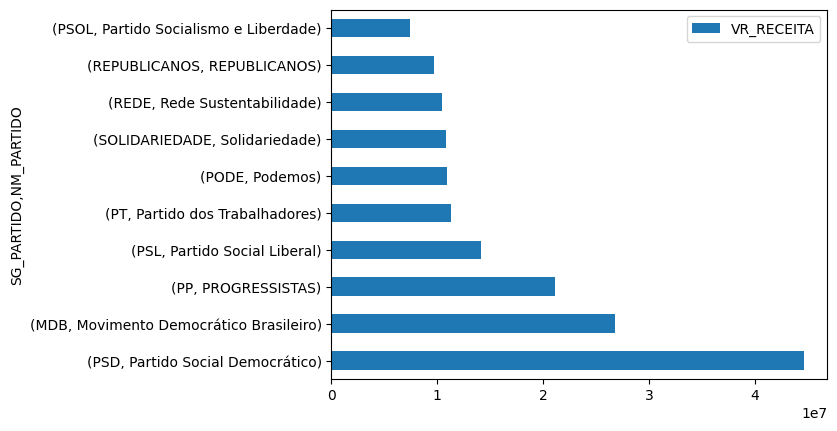

In [26]:
df_total_doacoes_partido_top10.plot(kind='barh')

## Qual o valor médio das doações por tipo de doador?

Agora é sua vez! A partir dos comandos anteriores, faça uma nova consulta para descobrir a mediana de acordo com o tipo de doador.

In [28]:
df_final[['TIPO_DOADOR', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR'], as_index=False).median()

,TIPO_DOADOR,VR_RECEITA
0,fisica,800.0
1,juridica,2000.0


## Qual o valor mais alto de doação por tipo de doador?

In [ ]:
df_final[['TIPO_DOADOR', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR'], as_index=False).max()

,TIPO_DOADOR,VR_RECEITA
0,fisica,200000.0
1,juridica,6900000.0


## Crie uma tabela com valor máximo, mínimo e a mediana, por estado e tipo de doador

In [ ]:
df_tipo_doador_estado = df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR', 'SG_UF']).sum()

df_tipo_doador_estado['MAXIMO'] = df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR', 'SG_UF']).max()
df_tipo_doador_estado['MINIMO'] = df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR', 'SG_UF']).min()
df_tipo_doador_estado['MEDIANA'] = df_final[['TIPO_DOADOR', 'SG_UF', 'VR_RECEITA']].groupby(by=['TIPO_DOADOR', 'SG_UF']).median()

df_tipo_doador_estado


VR_RECEITA     MAXIMO  MINIMO   MEDIANA
TIPO_DOADOR SG_UF                                          
fisica      AC       516688.26    40560.0    4.80   3000.00
            AM       491585.92    35000.0    2.00    500.00
            AP        82687.88    12000.0   49.88    500.00
            PA      4532569.87   200000.0    0.10   1000.00
            RO       815877.84   110000.0    1.20    600.00
            RR       170414.95    30000.0   23.74    300.00
            TO       414676.35    30000.0    0.01    561.65
juridica    AC     22585542.95  4900000.0   10.00   2550.00
            AM     35625509.00  6900000.0    0.04   1500.00
            AP     33073470.04  4900000.0    0.55  20000.00
            PA     42454506.85  4400000.0    0.10    463.00
            RO     22978320.93  2900000.0    0.40   7000.00
            RR     20868194.74  2900000.0   12.50   2045.00
            TO     24682986.39  4900000.0    0.05    600.00

# Entreviste você mesmo

Escreva abaixo pelo menos outras três perguntas que podem ser feitas à base de dados. Escreva a pergunta como um comentário acima do código com a consulta em Python.